# First EDA of Official Reddit /r/place Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path

In [2]:
base_path = Path('/media/robmulla/moardata/reddit_place/')

In [3]:
df = pd.read_parquet(base_path / 'combined_v1.parquet')

In [4]:
%%time
user_counts = df['user_id'].value_counts()

CPU times: user 58.3 s, sys: 5.74 s, total: 1min 4s
Wall time: 1min 1s


In [13]:
top_placer = user_counts.index[0]
top_df = df.query('user_id == @top_placer').copy()

In [ ]:
plt.imread('../input/reddit-rplace-2022-history/images_single/

In [42]:
meta_data = pd.read_parquet('place_metadata.parquet')

In [46]:
def load_combine_canvas(row):
    imgc0 = plt.imread(row[0])
    if type(row[1]) == str:
        imgc1 = plt.imread(row[1])
    else:
        imgc1 = np.zeros_like(imgc0)

    if type(row[2]) == str:
        imgc2 = plt.imread(row[2])
    else:
        imgc2 = np.zeros_like(imgc0)

    if type(row[3]) == str:
        imgc3 = plt.imread(row[3])
    else:
        imgc3 = np.zeros_like(imgc0)

    img_combined = np.concatenate(
        [
            np.concatenate([imgc0, imgc1], axis=1),
            np.concatenate([imgc2, imgc3], axis=1),
        ],
        axis=0,
    )
    return img_combined

def unstack_metadata(meta_data):
    # Metadata when there are 4 canvas
    four_views = meta_data.groupby(["dt", "canvas"])["filename_full"].first().unstack()
    return four_views

In [57]:
four_views = unstack_metadata(meta_data)
img = load_combine_canvas(four_views.reset_index(drop=True).loc[8000])

(470.95, 604.05, 426.65, 478.35)

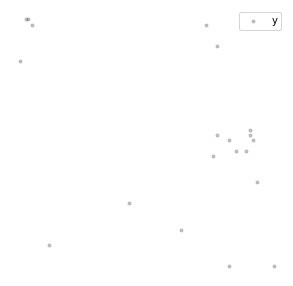

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
top_df.query('x > 400 and x < 600 and y > 400 and y < 600') \
    .plot(x='x', y='y', style='.', ax=ax, color=top_df['pixel_color'].astype('str').values,
           alpha=0.2)
ax.axis('off')

# Take the Top 100

In [69]:
top_placers = user_counts.head(100).index
top_df = df.query('user_id in @top_placers').copy()

(-0.5, 1999.5, 1999.5, -0.5)

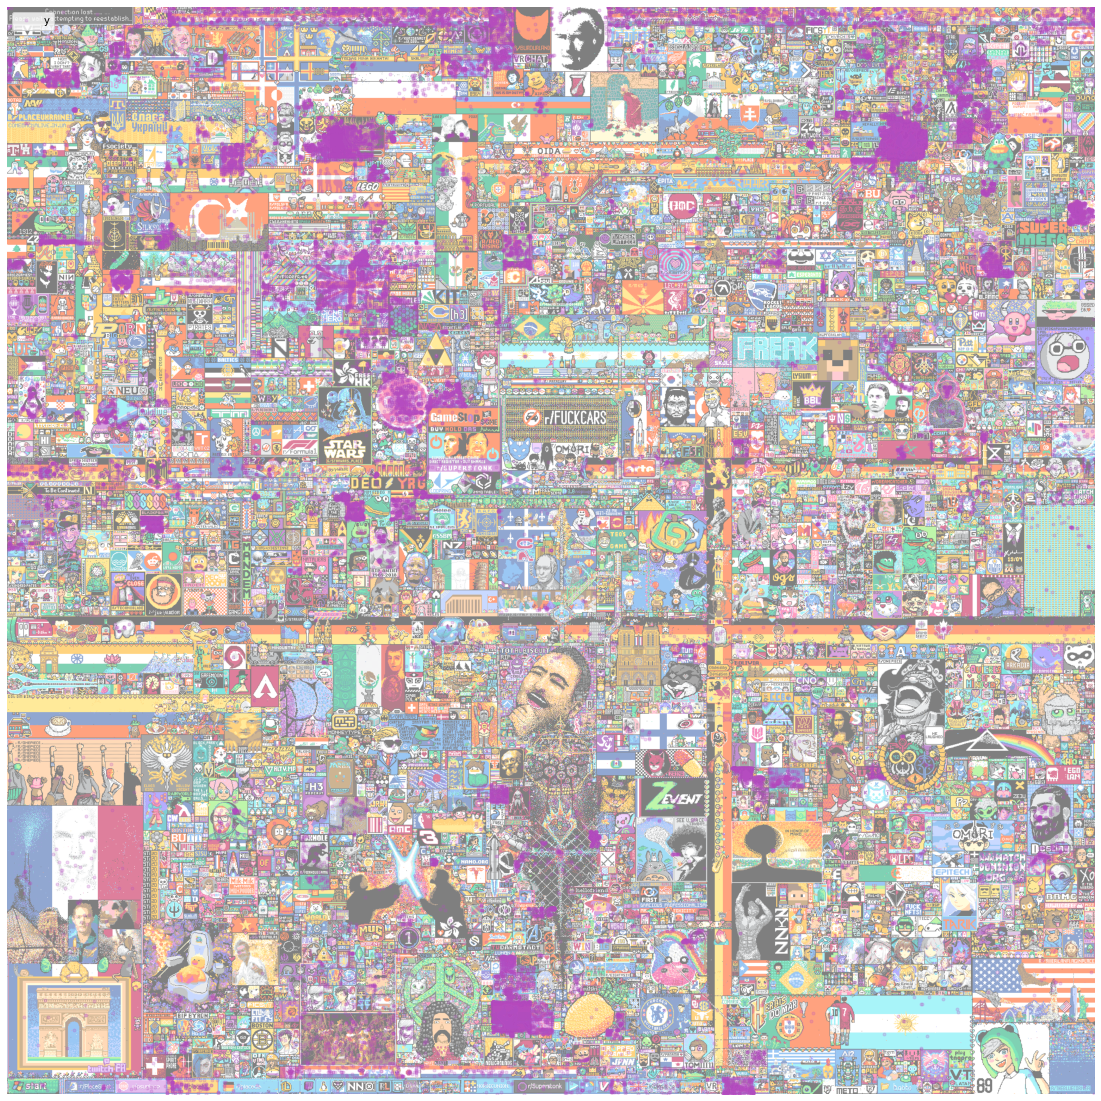

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img, alpha=0.5)
top_df.plot(x='x', y='y',
            style='.',
            ax=ax,
            color=top_df['pixel_color'].astype('str').values,
            alpha=0.2)
ax.axis('off')